# Trabalho 1 - Aprendizado Supervisionado

<h4>Leandro Baldini Nogueira - 801057</h4>

## Importando bibliotecas

O DataSet usado pode ser encontrado no seguinte link: <link>https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset</link>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('healthcare-dataset-stroke-data.csv')
dados_sem_tratamento = pd.read_csv('healthcare-dataset-stroke-data.csv')

## Análise exploratória dos dados

### Valores nulos e outliers

#### Lidando com valores nulos

In [2]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<p>Iremos trabalhar com uma base de dados que possui 5110 linhas e 12 features(colunas)</p>

In [151]:
dados.shape

(5110, 12)

<p>Logo de cara percebemos que além do index, há uma coluna no dataset referente aos ID's de cada indivíduo contido no dataset, a princípio essa variável não será importante para treinar nosso modelo pois não expressa nenhum tipo de informação, por isso iremos remove-la do conjunto de dados</p>

In [152]:
dados.drop('id', axis=1, inplace=True)
dados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Agora iremos verificar se alguma coluna possui valores nulos, e caso houver, tomar as devidas providências

In [153]:
dados.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<p>Notamos que apenas a coluna de índice de massa corporal possui valores nulos.</p></br>
Temos duas opções: </br>
<p>                  - Retirar a coluna de 'bmi' </p>
<p>                  - Fazer a substituição de valores com alguma técnica</p></br>
Como o índice de massa corporal é um dado muito importante na avaliação de casos de AVC, optamos por manter a coluna e substituir os valores nulos

In [154]:
dados.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

#### Lidando com outliers

Analisando a média, a mediana e o valor máximo da coluna ['bmi'], notamos a presença de um possível outlier, pois o crescimento do último valor do terceiro quartil para o valor máximo está muito grande, por isso iremos plotar uma boxplot para deixar mais claro e evidente.

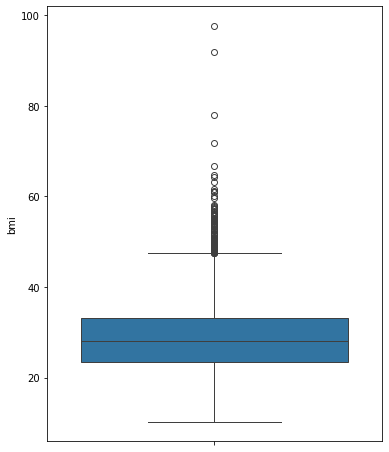

In [155]:
box_bmi = sns.boxplot(dados.bmi)
box_bmi.figure.set_size_inches(6, 8)

In [156]:
#Retirando valores nulos e achando os valores extremos da coluna 'bmi', possíveis outliers
bmi_sem_nulos = dados.bmi.dropna()
bmi_sem_nulos.sort_values().tail(20)

4475    57.2
1595    57.3
715     57.5
1898    57.7
4351    57.9
3060    58.1
3588    59.7
466     60.2
4838    60.9
270     60.9
2840    61.2
3825    61.6
2764    63.3
4188    64.4
358     64.8
1559    66.8
544     71.9
928     78.0
4209    92.0
2128    97.6
Name: bmi, dtype: float64

Dando uma pesquisada sobre Índice de Massa Corporal - IMC (bmi), observei que valores de imc maiores que 40 já é considerado obesidade mórbida, por isso, alguns dados presentes na tabela estão errados, pois é impossível uma pessoa possuir mais que 90 de imc, e também é muito difícil haver valores maiores que 60. Por isso iremos manter apenas as tuplas com imc menores que 60

In [157]:
#Selecionando os últimos 13 valores que se encontram na faixa maior que 60 de imc
imc_improvaveis = bmi_sem_nulos.sort_values().tail(13).index
dados.drop(imc_improvaveis, axis=0, inplace=True)

Agora que foram retirados os outliers, iremos optar por tratar os dados nulos substituindo-os pela média, uma vez que analisando o boxplot, é possível notar que a grande maioria dos dados se encontram próximos à média e o desvio padrão é próximo de 8

In [158]:
dados.bmi.fillna(dados.bmi.mean(), inplace=True)
dados.isnull().sum()

C:\Users\Leandro\AppData\Local\Temp\ipykernel_21612\2628541547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados.bmi.fillna(dados.bmi.mean(), inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Replotando o boxplot após a remoção dos outliers

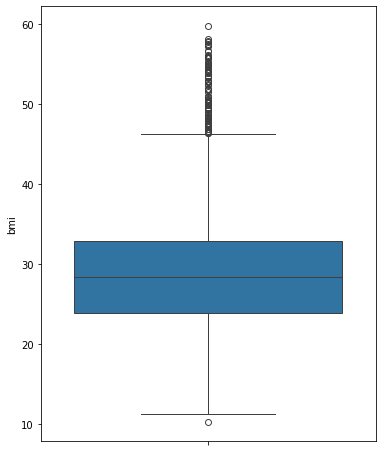

In [159]:
box_bmi = sns.boxplot(dados.bmi)
box_bmi.figure.set_size_inches(6, 8)

Agora iremos averiguar se não há mais nenhuma feature com possíveis outliers.

In [160]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5097.0,43.229154,22.629979,0.08,25.00,45.00,61.00,82.00
hypertension,5097.0,0.096724,0.295610,0.00,0.00,0.00,0.00,1.00
heart_disease,5097.0,0.054149,0.226335,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5097.0,106.159892,45.284811,55.12,77.28,91.89,114.09,271.74
bmi,5097.0,28.785396,7.404844,10.30,23.80,28.40,32.80,59.70
stroke,5097.0,0.048852,0.215580,0.00,0.00,0.00,0.00,1.00


Observando cada linha é possível perceber que a coluna 'avg_glucose_level' possui um valor máximo muito maior que seu último valor do terceiro quartil, vamos plotar um boxplot para analisar melhor.

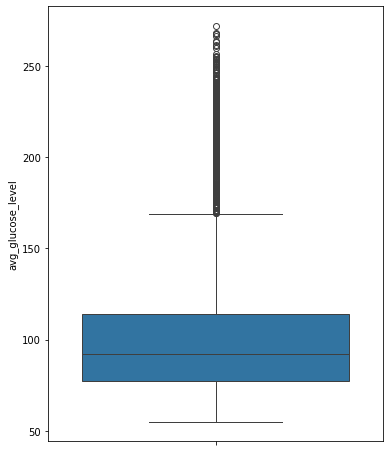

In [161]:
box_glucose = sns.boxplot(dados.avg_glucose_level)
box_glucose.figure.set_size_inches(6, 8)

Como visto no boxplot, há diversos outliers e pesquisando um pouco, conferimos que gestantes possuem níveis de glicose no sangue aumentada ao fim da gestação e também pode ser o caso de pessoas diabéticas que possuem os valores de glicose no sangue bem elevados, então iremos manter esses outliers, pois podem sim ser valores reais.

### Plotando gráficos para melhor visualização dos dados

#### Variáveis numéricas

<Figure size 1440x1296 with 0 Axes>

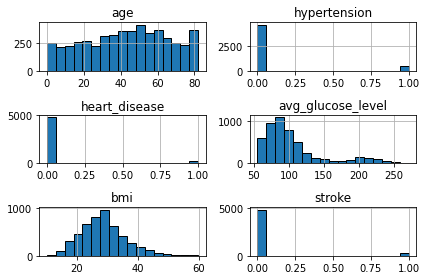

In [162]:
# Selecionar apenas as colunas numéricas
colunas_numericas = dados.select_dtypes(include=[float, int]).columns

# Gerar histogramas para as colunas numéricas
plt.figure(figsize=(20, 18))
dados[colunas_numericas].hist(bins=17, edgecolor='black')
plt.tight_layout()
plt.show()

#### Variáveis categóricas

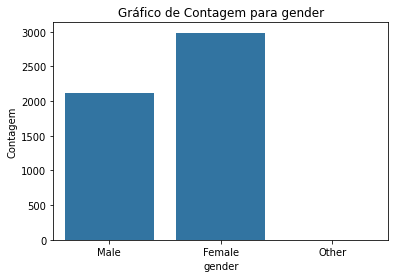

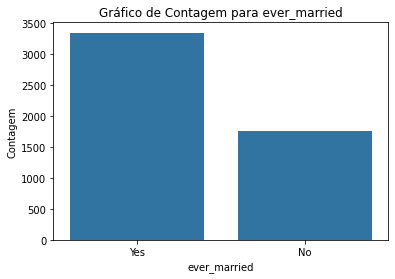

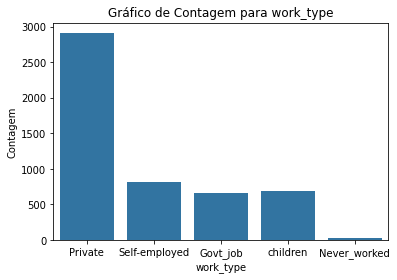

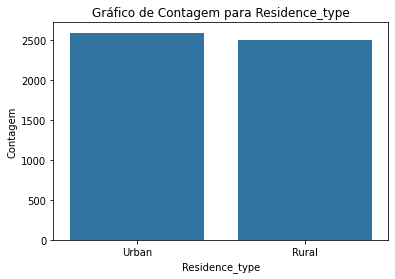

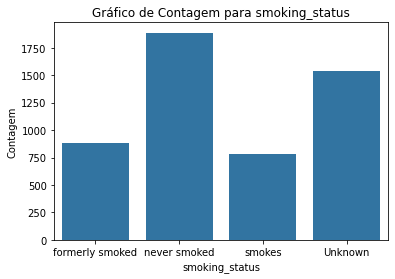

In [163]:
# Selecionar apenas as colunas categóricas
colunas_categoricas = ['gender','ever_married','work_type', 'Residence_type', 'smoking_status']

# Criar gráficos para cada coluna categórica
for coluna in colunas_categoricas:
    # Gráfico de Contagem (Count Plot)
    plt.figure(figsize=(6, 4))
    sns.countplot(data=dados, x=coluna)
    plt.title(f'Gráfico de Contagem para {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.show()

### Tratamendo de dados

#### Removendo valores insignificantes

No gráfico de gêneros apareceu uma outra classificação que não estavamos esperando, pelo gráfico parece insignificante, vamos ver quantos dados possui essa classificação.

In [164]:
dados.gender.value_counts()

gender
Female    2985
Male      2111
Other        1
Name: count, dtype: int64

Como há apenas 1 dado com gênero 'other', podemos remover a linha em que esse dado aparece.

In [165]:
remover = dados.query('gender=="Other"').index
dados.drop(remover, axis=0, inplace=True)

Esse caso é semelhante, na parte de work_type, pouquissimos estão classificados como 'never_worked', então podemos remove-lo sem preocupação para deixar nossa base de dados o mais objetivo possível para o treinamento

In [166]:
dados.work_type.value_counts()

work_type
Private          2912
Self-employed     818
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [167]:
remover = dados.query('work_type=="Never_worked"').index
dados.drop(remover, axis=0, inplace=True)

#### Tranformando variáveis categóricas em numéricas

Agora já está quase tudo pronto para iniciar o treinamento. Como um dos métodos que vamos utilizar é o K-Nearest Neighbors e este usa a distância entre pontos para treinamento, realizar a codificação binária é um passo essencial. Então iremos tranformar as variáveis categóricas em variáveis numéricas para melhor treinamento do modelo.

In [168]:
dados.gender = dados.gender.map({'Female' : 0, 'Male' : 1})
dados.ever_married = dados.ever_married.map({'No' : 0, 'Yes' : 1})
dados.Residence_type = dados.Residence_type.map({'Urban' : 0, 'Rural' : 1})
dados.work_type = dados.work_type.map({'children' : 0, 'Govt_job' : 1, 'Self-employed' : 2, 'Private' : 3})
dados.smoking_status = dados.smoking_status.map({'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3})


In [169]:
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,0,228.69,36.600000,2,1
1,0,61.0,0,0,1,2,1,202.21,28.785396,1,1
2,1,80.0,0,1,1,3,1,105.92,32.500000,1,1
3,0,49.0,0,0,1,3,0,171.23,34.400000,3,1
4,0,79.0,1,0,1,2,1,174.12,24.000000,1,1


Além disso, olhando para a coluna de 'bmi' percebemos que os números estão com diversas casas decimais, o que dependendo do modelo pode causar ruidos desnecessários. Deixar apenas 2 casas decimais pode ajudar na redução da dimensionalidade e consequente aumento na precisão do modelo, então é isso que iremos fazer. Podemos fazer isso sem nos preocupar pois analisando o valor máximo e mínimo dessa coluna, há uma diferença de 50 unidades, então 2 casas decimais ainda mantém a precisão dos dados

In [170]:
dados.bmi = dados.bmi.round(2)
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,0,228.69,36.60,2,1
1,0,61.0,0,0,1,2,1,202.21,28.79,1,1
2,1,80.0,0,1,1,3,1,105.92,32.50,1,1
3,0,49.0,0,0,1,3,0,171.23,34.40,3,1
4,0,79.0,1,0,1,2,1,174.12,24.00,1,1


#### Heatmap de correlações

Agora está faltando analisar as correlações entre as variáveis, principalmente as correlações das features com o output, afim de podermos avaliar se as features irão influenciar na boa predição dos modelos, para isso iremos plotar um heatmap

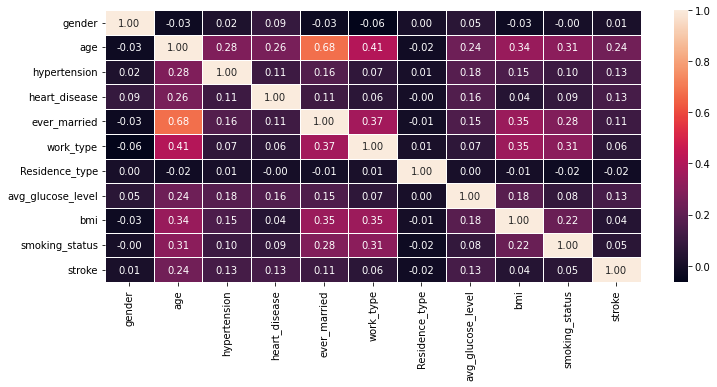

In [171]:
plt.figure(figsize = (12,5))
sns.heatmap(dados.corr(), annot=True, fmt=".2f", linewidths=.7)
plt.show()

Aqui podemos perceber que quase nenhuma feature possui uma forte correlação com o output (stroke), seja ela correlação positiva ou negativa. Isso pode indicar algum problema com a variável dependente. Logo iremos plotar o histograma do output. 

<Axes: xlabel='stroke', ylabel='Count'>

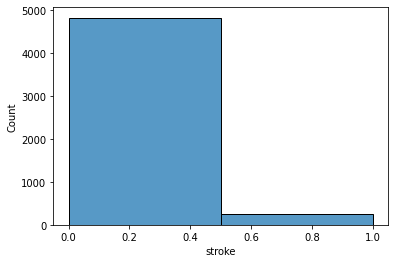

In [172]:
sns.histplot(dados.stroke, bins=2)

#### Ressampling de amostras do output 'stroke'

Aqui percebemos que há um grande desbalanceamento dos dados. Esse desbalanceamento atrapalha no treinamento e predição dos modelos podendo causar <strong>OVERFITTING</strong>. Para resolver esse problema iremos utilizar das técnicas de sampling

In [173]:
from imblearn.combine import SMOTEENN

smoteen = SMOTEENN()

Aqui optamos por utilizar a combinação de duas técnicas de sampling, undersampling e oversampling. Optamos por esse método pois o desbalanceamento dos nossos dados é muito grande, então enquanto um método reduz a amostragem da maior classe, o outro método aumenta a amostragem da menor, balanceando nossos dados de uma maneira adequada.

<Axes: xlabel='stroke', ylabel='Count'>

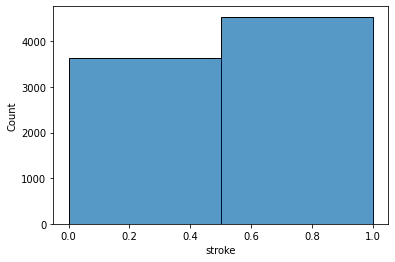

In [174]:
X, y = smoteen.fit_resample(dados.drop(columns='stroke'), dados.stroke)
sns.histplot(y, bins=2)


Com os dados equilibrados, basta concatenarmos X e y e partirmos para o treinamento dos modelos

In [175]:
dados_final = pd.concat([X, y], axis=1)
dados_final.shape

(8171, 11)

Plotando novamente o heatmap para ver se houve alteração nas correlações

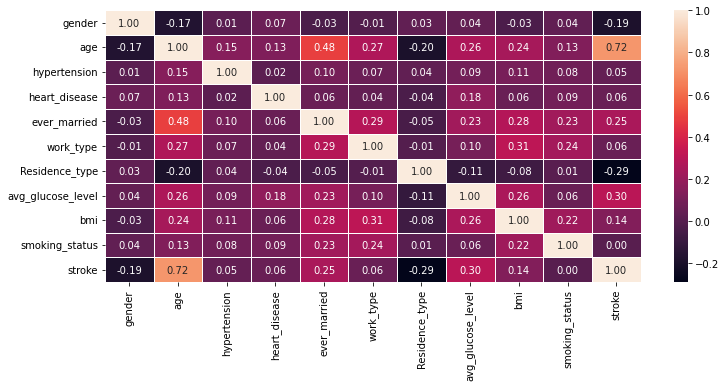

In [176]:
plt.figure(figsize = (12,5))
sns.heatmap(dados_final.corr(), annot=True, fmt=".2f", linewidths=.7)
plt.show()

Aqui percebemos que houve alteração nas correlações e que a feature 'idade' é a que mais influenciará na predição

## Treino e Teste

<h3>Divisão de treino e teste, usaremos 80% das amostras como treino e 20% como teste

In [177]:
X = dados_final.drop(columns=['stroke'])
y = dados_final.stroke

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2, stratify=y)

print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(X_train), len(X_test)))

Treinaremos com 6536 elementos e testaremos com 1635 elementos


Criando função para treinamento dos modelos, tendo k_fold do Cross-Validation como 5

In [200]:
def fit_model(classifier):
    model = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print('Acurácia do teste "dummie": %.2f%%' % accuracy)

    cv_score = cross_val_score(classifier, X, y, cv=5)
    print('Acurácias do teste Cross-Validation: ', (cv_score * 100).round(2))

    precision = precision_score(y_test, y_pred, average='macro') * 100
    print('Precisão: %.2f%%' % precision)

    recall = recall_score(y_test, y_pred, average='macro') * 100
    print('Taxa de Recuperação: %.2f%%' % recall)
    return model

Demos importância em colocar as métricas do recall_score pois como é um DataSet de prevenção de doença, essa métrica se mostra muito importante nesse tipo de classficação pois Falsos Negativos podem acarretar em sérios problemas, classficar um indivíduo como "saudável" e isso ser um falso negativo estaria enganando e prejudicando este indivíduo

### Utilizando método K-Nearest Neighbors (KNN)

Iremos utilizar a técnica de GridSearch para a otimização de hiperparâmetros, nesse caso, do n_neighbors

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15] # Apenas números ímpares para não haver empate na decisão de classficar
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'n_neighbors': 1}


In [202]:
model = fit_model(KNeighborsClassifier(n_neighbors=1))

Acurácia do teste "dummie": 99.39%
Acurácias do teste Cross-Validation:  [99.39 99.51 99.08 99.14 99.76]
Precisão: 99.46%
Taxa de Recuperação: 99.31%


Agora iremos plotar uma matrix de confusão para entender melhor como nosso algoritmo está classificando as amostras

<Axes: >

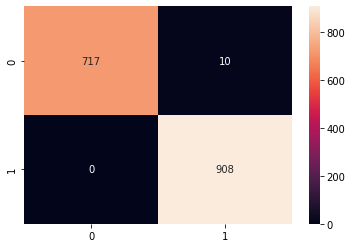

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

Apesar de possuir uma boa precisão, a quantidade de falsos negativos é um tanto quanto relevante e no caso de doenças, é algo a ser levado em conta

### Utilizando método Decision Tree

Iremos utilizar a técnica de GridSearch para a otimização de hiperparâmetros, nesse caso, do max_depth

In [189]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [1, 2, 3, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 3}


In [190]:
model = fit_model(DecisionTreeClassifier(max_depth=3))

Acurácia do teste "dummie": 86.30%
Acurácias do teste Cross-Validation:  [86.06 85.86 85.86 85.07 88.56]
Precisão: 87.25%
Taxa de Recuperação: 85.35%


Plotando matrix de confusão

<Axes: >

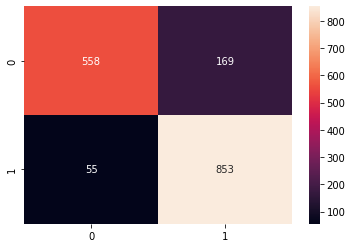

In [191]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f')

Plotando árvore com os índices de gini e quantidade de samples

[Text(0.5, 0.875, 'age <= 49.004\ngini = 0.494\nsamples = 6536\nvalue = [2905.0, 3631.0]'),
 Text(0.25, 0.625, 'age <= 37.071\ngini = 0.126\nsamples = 2232\nvalue = [2081, 151]'),
 Text(0.125, 0.375, 'smoking_status <= 1.5\ngini = 0.017\nsamples = 1555\nvalue = [1542, 13]'),
 Text(0.0625, 0.125, 'gini = 0.002\nsamples = 1237\nvalue = [1236, 1]'),
 Text(0.1875, 0.125, 'gini = 0.073\nsamples = 318\nvalue = [306, 12]'),
 Text(0.375, 0.375, 'Residence_type <= 0.5\ngini = 0.325\nsamples = 677\nvalue = [539, 138]'),
 Text(0.3125, 0.125, 'gini = 0.423\nsamples = 375\nvalue = [261, 114]'),
 Text(0.4375, 0.125, 'gini = 0.146\nsamples = 302\nvalue = [278, 24]'),
 Text(0.75, 0.625, 'age <= 67.022\ngini = 0.31\nsamples = 4304\nvalue = [824, 3480]'),
 Text(0.625, 0.375, 'bmi <= 26.001\ngini = 0.453\nsamples = 1816\nvalue = [630, 1186]'),
 Text(0.5625, 0.125, 'gini = 0.366\nsamples = 203\nvalue = [154, 49]'),
 Text(0.6875, 0.125, 'gini = 0.416\nsamples = 1613\nvalue = [476, 1137]'),
 Text(0.875, 0.3

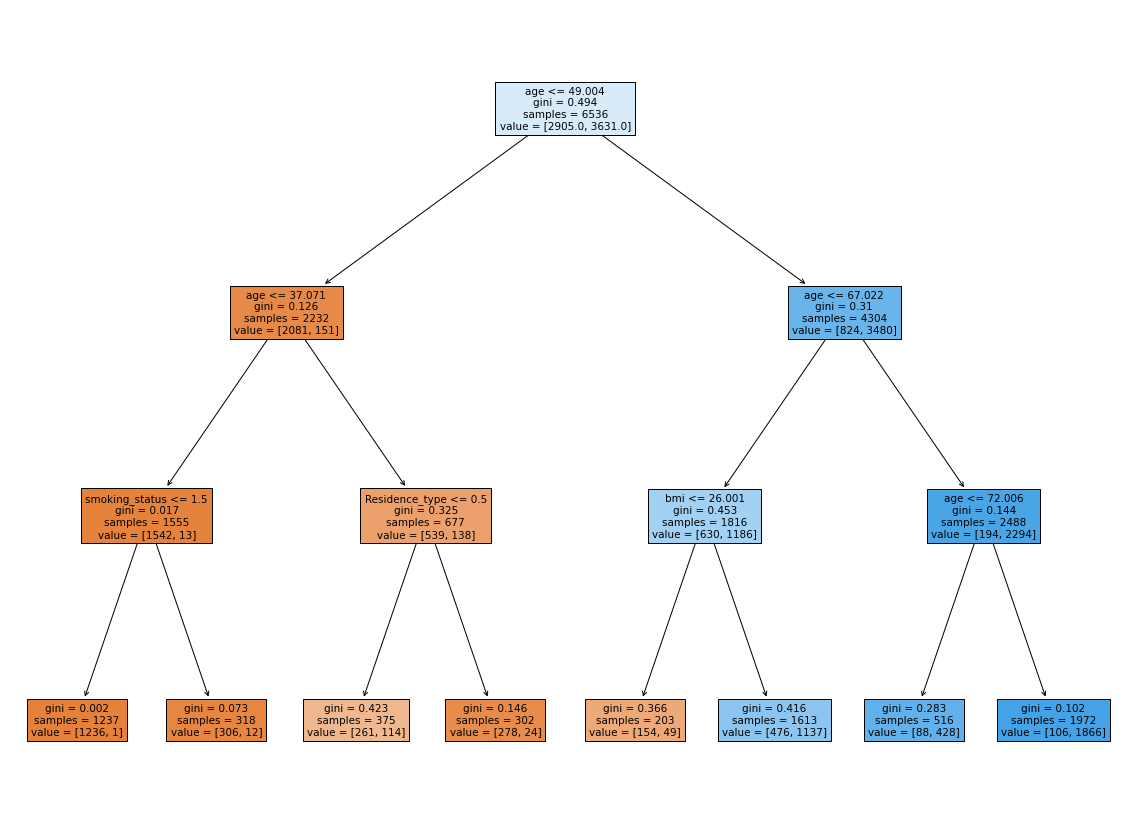

In [193]:
plt.figure(figsize=(20,15))
plot_tree(model, feature_names=X_train.columns, filled=True)

## Conclusão

Pelas métricas de avaliação, podemos perceber que o treinamento dos dados desse DataSet foi superior na maioria das métricas com o modelo de <strong>KNN</strong>